# Bike Sharing Assignment - Multiple Linear Regression

# Imports

In [203]:
import os

# Imports for data processing
import pandas as pd
import numpy as np

# Imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for machine learning and statistics
import sklearn
import statsmodels

# Imports for preprocessing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Imports for building model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Imports for postprocessing
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [204]:
import warnings
warnings.filterwarnings('ignore')

# 1> Data Read 

In [205]:
df_bs = pd.read_csv('day.csv')
df_bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.1> Check the shape

In [206]:
df_bs.shape

(730, 16)

### 1.2> Check for NULLs and Type

In [207]:
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# 2> Data Understanding

### 2.1> Drop unwanted columns

- Our Target variable is 'cnt' 
- Drop instant, dteday, casual and registered 

In [208]:
drop_list = ['instant', 'dteday', 'casual', 'registered']
df_bs = df_bs.drop(drop_list, axis=1)
df_bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 2.2> Analyse Categorical variables

In [209]:
print(df_bs.season.value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64


In [210]:
print(df_bs.mnth.value_counts())

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64


In [211]:
print(df_bs.weekday.value_counts())

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64


In [212]:
print(df_bs.weathersit.value_counts())

1    463
2    246
3     21
Name: weathersit, dtype: int64


In [213]:
print(df_bs.holiday.value_counts())

0    709
1     21
Name: holiday, dtype: int64


In [214]:
df_bs.season = df_bs[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [215]:
mnth_dict = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
df_bs.mnth = df_bs[['mnth']].apply(lambda x: x.map(mnth_dict))

In [216]:
weekday_dict = {0:'sun', 1:'mon',  2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}
df_bs.weekday = df_bs[['weekday']].apply(lambda x: x.map(weekday_dict))

In [217]:
weathersit_dict = {1:'clear',  2:'misty', 3:'light', 4:'heavy'}
df_bs.weathersit = df_bs[['weathersit']].apply(lambda x: x.map(weathersit_dict))

# 3> Data Visualisation

In [218]:
df_bs.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349


In [219]:
df_bs.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## 3.1> Univariate analysis

### 3.1.1> Numeric variables

Let's analyse the relationship between target variables and numeric values in data

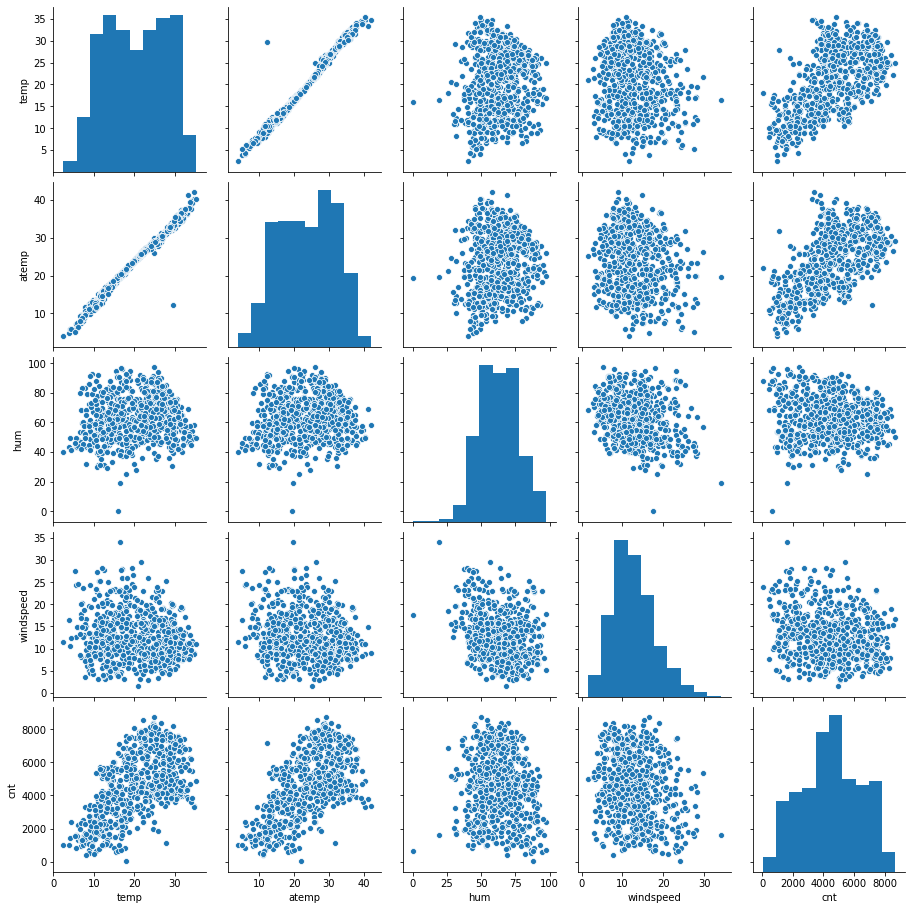

In [220]:
var_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df_bs[var_list])
plt.show()

### Inferences

- temp and atemp have very good linear relationship
- temp and count have positive correlation with large variance

### 3.1.2> Categorical variables

Let's do boxplots to understand the relationship between categorical and target variable

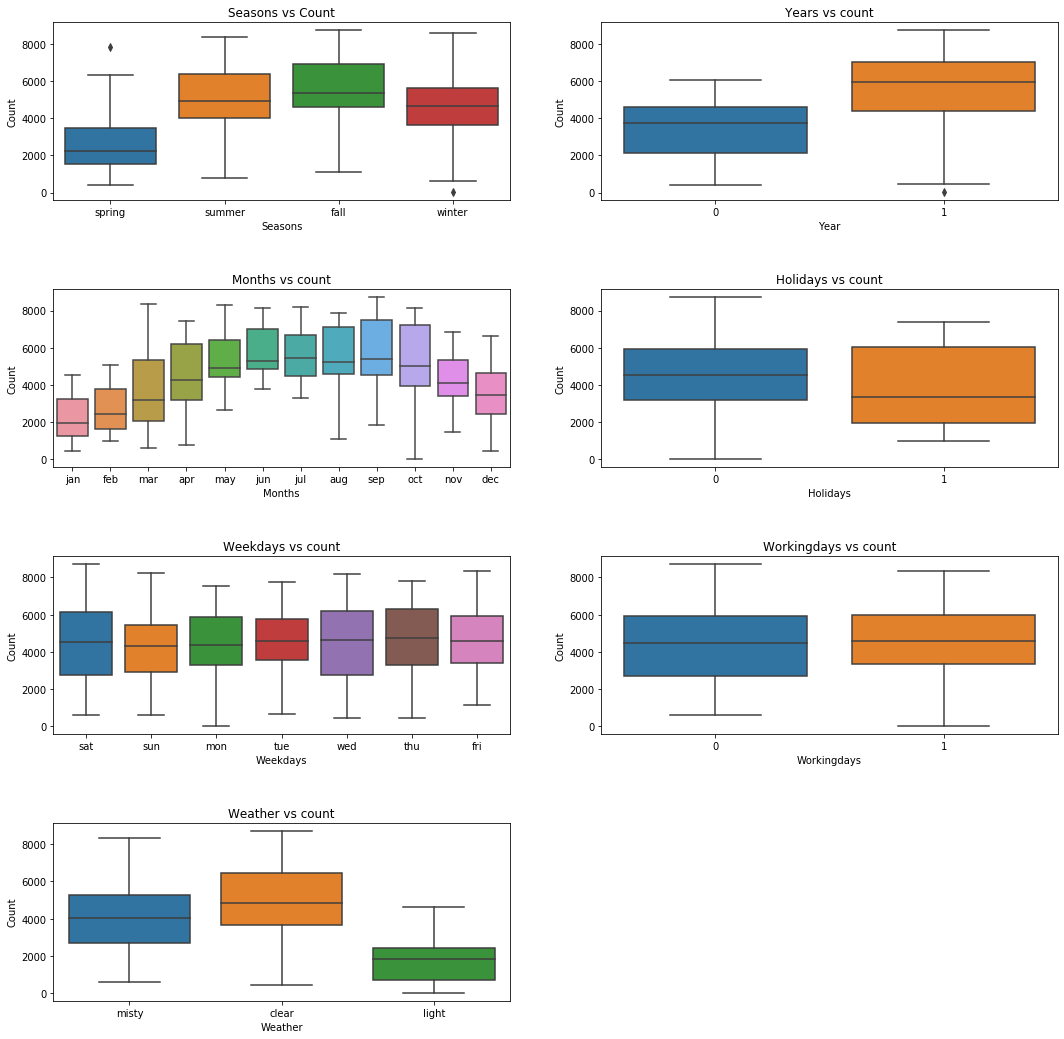

In [332]:
plt.figure(figsize=(18,18))
plt.subplots_adjust(hspace=.5)

plt.subplot(4,2,1)
plt.title('Seasons vs Count')
ax = sns.boxplot(x='season', y='cnt', data=df_bs)
ax.set(xlabel='Seasons', ylabel='Count')

plt.subplot(4,2,2)
plt.title('Years vs count')
ax = sns.boxplot(x='yr', y='cnt', data=df_bs)
ax.set(xlabel='Year', ylabel='Count')

plt.subplot(4,2,3)
plt.title('Months vs count')
ax = sns.boxplot(x='mnth', y='cnt', data=df_bs)
ax.set(xlabel='Months', ylabel='Count')

plt.subplot(4,2,4)
plt.title('Holidays vs count')
ax = sns.boxplot(x='holiday', y='cnt', data=df_bs)
ax.set(xlabel='Holidays', ylabel='Count')

plt.subplot(4,2,5)
plt.title('Weekdays vs count')
ax = sns.boxplot(x='weekday', y='cnt', data=df_bs)
ax.set(xlabel='Weekdays', ylabel='Count')

plt.subplot(4,2,6)
plt.title('Workingdays vs count')
ax = sns.boxplot(x='workingday', y='cnt', data=df_bs)
ax.set(xlabel='Workingdays', ylabel='Count')

plt.subplot(4,2,7)
plt.title('Weather vs count')
ax = sns.boxplot(x='weathersit', y='cnt', data=df_bs)
ax.set(xlabel='Weather', ylabel='Count')
plt.show()

## Inferences

- Summer and fall have more counts spring has the least counts
- Business has improved from 2018 to 2019
- Business is more towards the middle of the year
- business is more during non-holidays
- the median count for different days seems almost same across different days of week
- when there is light rain the count seems less and when its heavy it is nill. Clear sky weather has more counts

## 3.2> Bivariate Analysis

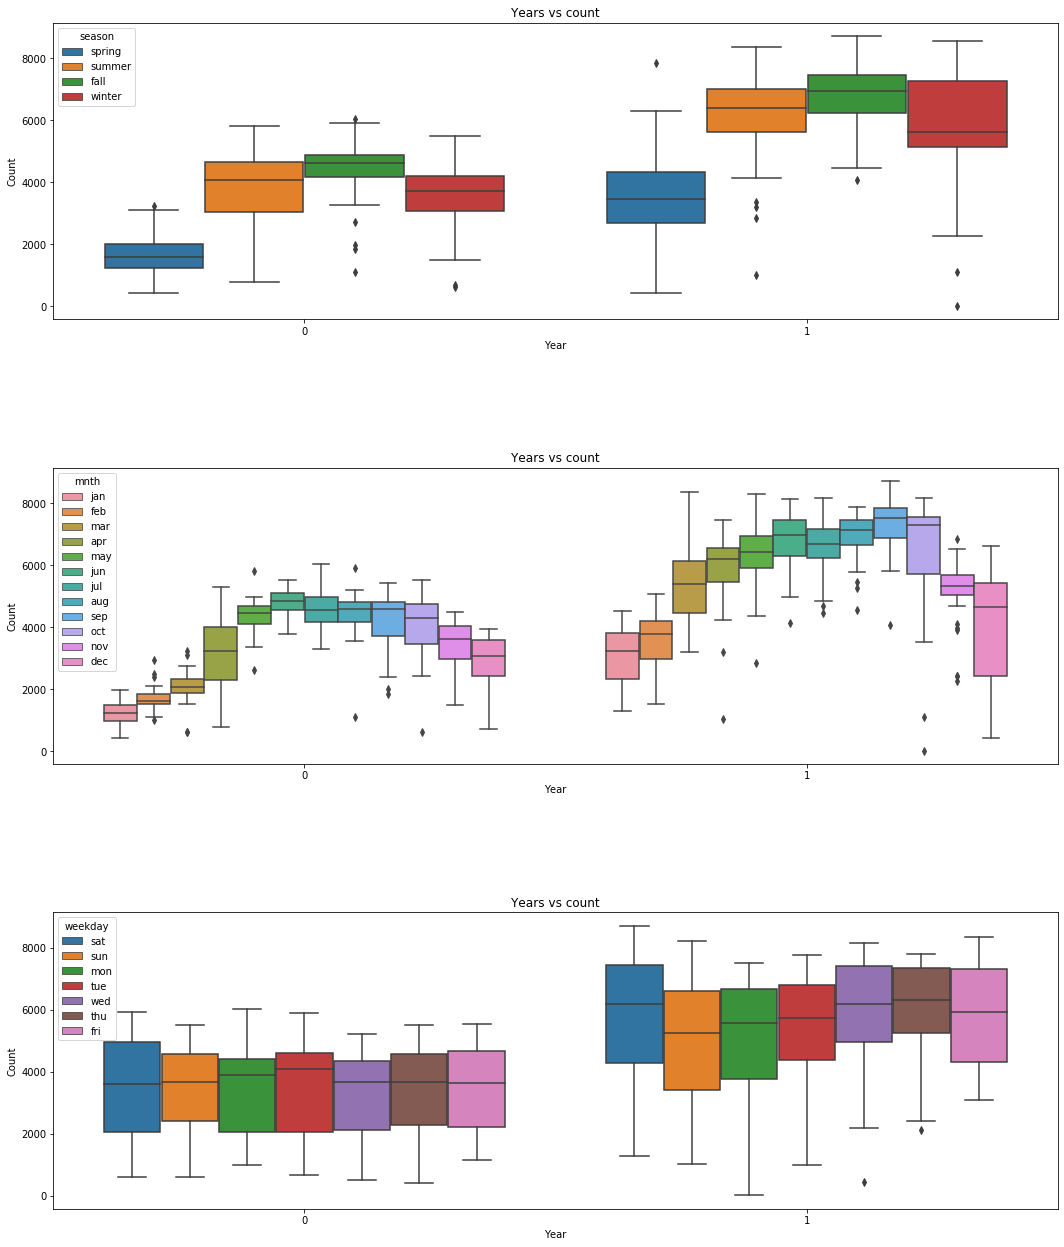

In [222]:
plt.figure(figsize=(18,30))
plt.subplots_adjust(hspace=.5)

plt.subplot(4,1,1)
plt.title('Years vs count')
ax = sns.boxplot(x='yr', y='cnt', hue='season', data=df_bs)
ax.set(xlabel='Year', ylabel='Count')

plt.subplot(4,1,2)
plt.title('Years vs count')
ax = sns.boxplot(x='yr', y='cnt', hue='mnth', data=df_bs)
ax.set(xlabel='Year', ylabel='Count')

plt.subplot(4,1,3)
plt.title('Years vs count')
ax = sns.boxplot(x='yr', y='cnt', hue='weekday', data=df_bs)
ax.set(xlabel='Year', ylabel='Count')

plt.show()

# 4> Data Preparation

## Since atemp and temp are highly correlated lets drop atemp

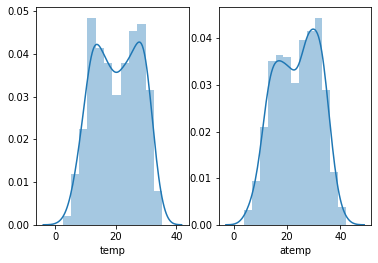

In [223]:
plt.subplot(1,2,1)
sns.distplot(df_bs.temp)

plt.subplot(1,2,2)
sns.distplot(df_bs.atemp)

plt.show()

In [224]:
df_bs = df_bs.drop('atemp', axis=1)

In [225]:
bs_data = df_bs.copy()

In [226]:
bs_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


## 4.1> One Hot Encoding for categorical variables

In [227]:
season = pd.get_dummies(bs_data.season, drop_first=True)
bs_data = pd.concat([bs_data, season], axis=1)
bs_data = bs_data.drop('season', axis=1)

mnth = pd.get_dummies(bs_data.mnth, drop_first=True)
bs_data = pd.concat([bs_data, mnth], axis=1)
bs_data = bs_data.drop('mnth', axis=1)

weekday = pd.get_dummies(bs_data.weekday, drop_first=True)
bs_data = pd.concat([bs_data, weekday], axis=1)
bs_data = bs_data.drop('weekday', axis=1)

weathersit = pd.get_dummies(bs_data.weathersit)
bs_data = pd.concat([bs_data, weathersit], axis=1)
bs_data = bs_data.drop('weathersit', axis=1)

In [228]:
bs_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'clear', 'light', 'misty'],
      dtype='object')

## 4.2> Train Test split

In [229]:
bs_data.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,sep,mon,sat,sun,thu,tue,wed,clear,light,misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [230]:
bs_data.shape

(730, 30)

In [231]:
df_train, df_test = train_test_split(bs_data, train_size=0.80, random_state=10)

In [232]:
print(df_train.shape, df_test.shape)

(584, 30) (146, 30)


## 4.3> MinMax Scaling

Perform Scaling for numeric values

In [233]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,sep,mon,sat,sun,thu,tue,wed,clear,light,misty
176,0,0,0,27.880000,51.3333,6.333731,5305,0,0,0,...,0,0,0,1,0,0,0,1,0,0
172,0,0,1,30.066653,70.7500,11.541554,4507,0,0,0,...,0,0,0,0,0,0,1,1,0,0
142,0,0,1,25.898347,81.0000,15.667414,4274,0,1,0,...,0,1,0,0,0,0,0,0,0,1
237,0,0,1,28.700000,76.1250,5.625488,4661,0,0,0,...,0,0,0,0,0,0,0,1,0,0
531,1,0,0,25.898347,50.4167,11.166689,7702,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [234]:
var_list=['temp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()

In [235]:
df_train[var_list].describe()

,temp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000
mean,20.269744,62.919161,12.650108,4481.450342
std,7.397586,14.577718,5.187492,1950.989488
min,2.424346,0.000000,1.500244,22.000000
25%,14.033962,51.916700,8.958888,3123.750000
50%,20.107097,63.083300,11.833607,4496.500000
75%,26.786653,73.463300,15.521505,5978.500000
max,35.328347,97.250000,34.000021,8714.000000


In [236]:
df_train[var_list] = scaler.fit_transform(df_train[var_list])

In [237]:
df_train[var_list].describe()

,temp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000
mean,0.542347,0.646984,0.343075,0.513052
std,0.224823,0.149899,0.159616,0.224458
min,0.000000,0.000000,0.000000,0.000000
25%,0.352833,0.533848,0.229498,0.356851
50%,0.537404,0.648671,0.317952,0.514784
75%,0.740406,0.755407,0.431426,0.685285
max,1.000000,1.000000,1.000000,1.000000


# 5> Data Modelling

## 5.1> Coarse Elimination with RFE 

- Since there are too many columns it is better to automate the extraction of predictors with RFE

In [238]:
df_train_cp = df_train.copy()

### 5.1.1> Get the X and y for training set

In [239]:
y_train = df_train_cp.pop('cnt')
X_train = df_train_cp

In [240]:
print(X_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'clear', 'light', 'misty'],
      dtype='object')


### 5.1.2> Build an RFE based model to get the top 15 predictors of bike sharing counts

In [241]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [242]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 8),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', False, 3),
 ('sun', False, 9),
 ('thu', False, 14),
 ('tue', False, 10),
 ('wed', False, 15),
 ('clear', True, 1),
 ('light', True, 1),
 ('misty', False, 2)]

In [243]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'feb', 'jan', 'jul', 'nov', 'sep', 'clear', 'light'],
      dtype='object')

### 5.1.3> Extract the important predictors from RFE results

In [244]:
cols = X_train.columns[rfe.support_]
X_train_rfe_out = X_train[cols]
X_train_rfe_out.head()

,yr,holiday,temp,hum,windspeed,spring,winter,dec,feb,jan,jul,nov,sep,clear,light
176,0,0,0.773634,0.527849,0.148724,0,0,0,0,0,0,0,0,1,0
172,0,0,0.840090,0.727506,0.308966,0,0,0,0,0,0,0,0,1,0
142,0,0,0.713409,0.832905,0.435916,0,0,0,0,0,0,0,0,0,0
237,0,0,0.798555,0.782776,0.126931,0,0,0,0,0,0,0,0,1,0
531,1,0,0.713409,0.518424,0.297431,0,0,0,0,0,0,0,0,1,0


## 5.2> Finetuning based on VIF and Statistics of model

### 5.2.1> Find the correlation for RFE predictors

In [245]:
X_train_rfe_out.shape

(584, 15)

In [246]:
X_train_rfe = X_train_rfe_out.copy()

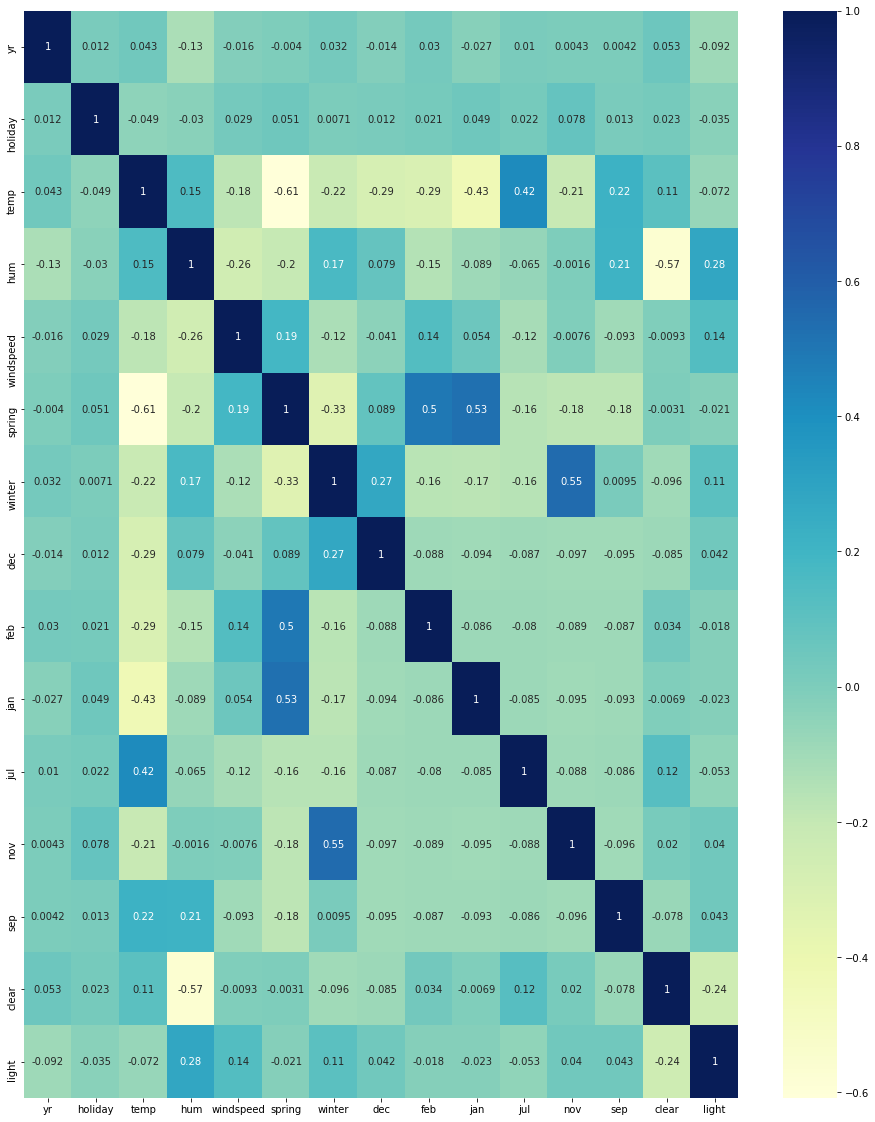

In [247]:
plt.figure(figsize=(16,20))
sns.heatmap(X_train_rfe.corr(), annot=True,  cmap='YlGnBu')
plt.show()

## Inferences

- Notice that temp has high negative correlation with spring
- Notice that clear sky has high negative correlation with humidity

### 5.2.2> build linear regression model with statsmodel and perform analysis

- Analyse the statistics of the model such as R2, adjusted R2, F-statistic
- Analyse the t-statistic and its p-values for the predictors
- Analyse the VIF of the predictors

#### Scenarios

- High pvalue, High VIF - Drop
- Low pvalue, Low VIF - Keep

We need an iterative method to figure out the following scenarios
- High pvalue, Low VIF
- Low pvalue, High VIF

In [248]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     201.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.27e-216
Time:                        17:05:40   Log-Likelihood:                 582.80
No. Observations:                 584   AIC:                            -1134.
Df Residuals:                     568   BIC:                            -1064.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3578      0.034     10.460      0.000       0.291       0.425
yr             0.2331      0.008     30.529      0.000       0.218       0.248
holiday       -0.0747      0.021     -3.508      0.000      -0.117      -0.033
temp           0.4095      0.031     13.100      0.000       0.348       0.471
hum           -0.1755      0.035     -4.962      0.000      -0.245      -0.106
windspeed     -0.1791      0.026     -6.922      0.000      -0.230      -0.128
spring        -0.0957      0.016     -5.820      0.000      -0.128      -0.063
winter         0.0741      0.013      5.676      0.000       0.048       0.100
dec           -0.0644      0.017     -3.834      0.000      -0.097      -0.031
feb           -0.0510      0.020     -2.575      0.010      -0.090      -0.012
jan           -0.0686      0.020     -3.413      0.001      -0.108      -0.029
jul           -0.0740      0.017     -4.466      0.000      -0.107      -0.041
nov           -0.0703      0.018     -3.994      0.000      -0.105      -0.036
sep            0.0475      0.014      3.322      0.001       0.019       0.076
clear          0.0483      0.010      4.869      0.000       0.029       0.068
light         -0.1769      0.022     -7.937      0.000      -0.221      -0.133
==============================================================================
Omnibus:                       99.386   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.158
Skew:                          -0.845   Prob(JB):                     2.17e-59
Kurtosis:                       5.872   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.2.3> Calculate VIF of predictors

In [249]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, idx),2) for idx in range(X_train_rfe.shape[1])]
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
2,temp,20.09
3,hum,18.89
4,windspeed,5.07
5,spring,4.42
13,clear,3.32
6,winter,2.89
9,jan,2.37
8,feb,2.10
0,yr,2.00
11,nov,1.94


### 5.2.4> Analysis II - removal of 'temp' and its impact

In [250]:
X_train_rfe_temp = X_train_rfe.copy()

In [251]:
X_train_rfe_temp = X_train_rfe_temp.drop('temp', axis=1)
X_train_sm = sm.add_constant(X_train_rfe_temp)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.22e-184
Time:                        17:05:40   Log-Likelihood:                 505.72
No. Observations:                 584   AIC:                            -981.4
Df Residuals:                     569   BIC:                            -915.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5392      0.036     15.122      0.000       0.469       0.609
yr             0.2427      0.009     28.008      0.000       0.226       0.260
holiday       -0.0745      0.024     -3.069      0.002      -0.122      -0.027
hum           -0.0653      0.039     -1.668      0.096      -0.142       0.012
windspeed     -0.1907      0.029     -6.469      0.000      -0.249      -0.133
spring        -0.1798      0.017    -10.425      0.000      -0.214      -0.146
winter         0.0249      0.014      1.746      0.081      -0.003       0.053
dec           -0.1346      0.018     -7.417      0.000      -0.170      -0.099
feb           -0.1019      0.022     -4.597      0.000      -0.145      -0.058
jan           -0.1566      0.022     -7.245      0.000      -0.199      -0.114
jul            0.0107      0.017      0.614      0.539      -0.023       0.045
nov           -0.1307      0.019     -6.746      0.000      -0.169      -0.093
sep            0.0707      0.016      4.370      0.000       0.039       0.102
clear          0.0754      0.011      6.816      0.000       0.054       0.097
light         -0.2002      0.025     -7.905      0.000      -0.250      -0.150
==============================================================================
Omnibus:                      103.447   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.094
Skew:                          -0.909   Prob(JB):                     1.49e-56
Kurtosis:                       5.694   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Notice that although 'temp' has high VIF removal of 'temp' creates a drop of 7% Hence it is better to keep 'temp' predictor

### 5.2.5> Analysis III - Removal of 'hum' with the second worst VIF

- Notice that 'hum' column has very high VIF of 19 (way greater than 5)
- Lets remove 'hum' and rebuild the model

In [252]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.98e-212
Time:                        17:05:41   Log-Likelihood:                 570.41
No. Observations:                 584   AIC:                            -1111.
Df Residuals:                     569   BIC:                            -1045.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2353      0.024      9.735      0.000       0.188       0.283
yr             0.2386      0.008     30.937      0.000       0.223       0.254
holiday       -0.0752      0.022     -3.461      0.001      -0.118      -0.033
temp           0.3726      0.031     12.025      0.000       0.312       0.433
windspeed     -0.1416      0.025     -5.608      0.000      -0.191      -0.092
spring        -0.0964      0.017     -5.747      0.000      -0.129      -0.063
winter         0.0678      0.013      5.118      0.000       0.042       0.094
dec           -0.0726      0.017     -4.257      0.000      -0.106      -0.039
feb           -0.0532      0.020     -2.631      0.009      -0.093      -0.013
jan           -0.0762      0.020     -3.721      0.000      -0.116      -0.036
jul           -0.0637      0.017     -3.797      0.000      -0.097      -0.031
nov           -0.0730      0.018     -4.066      0.000      -0.108      -0.038
sep            0.0396      0.015      2.733      0.006       0.011       0.068
clear          0.0766      0.008      9.241      0.000       0.060       0.093
light         -0.2027      0.022     -9.163      0.000      -0.246      -0.159
==============================================================================
Omnibus:                      103.352   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.557
Skew:                          -0.857   Prob(JB):                     1.48e-65
Kurtosis:                       6.055   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, idx),2) for idx in range(X_train_rfe.shape[1])]
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
2,temp,6.02
3,windspeed,4.99
4,spring,3.99
12,clear,2.88
5,winter,2.55
8,jan,2.19
7,feb,2.06
0,yr,1.99
10,nov,1.88
6,dec,1.59


### 5.2.6> Analysis IV - Removal of 'windspeed' with the second worst VIF after 'temp'

- Notice that 'windspeed' column has VIF close to 5 
- Lets remove 'windspeed' and rebuild the model

In [254]:
X_train_rfe = X_train_rfe.drop('windspeed', axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     207.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.97e-206
Time:                        17:05:41   Log-Likelihood:                 554.70
No. Observations:                 584   AIC:                            -1081.
Df Residuals:                     570   BIC:                            -1020.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1743      0.022      7.868      0.000       0.131       0.218
yr             0.2382      0.008     30.100      0.000       0.223       0.254
holiday       -0.0790      0.022     -3.541      0.000      -0.123      -0.035
temp           0.3920      0.032     12.403      0.000       0.330       0.454
spring        -0.0996      0.017     -5.787      0.000      -0.133      -0.066
winter         0.0774      0.013      5.739      0.000       0.051       0.104
dec           -0.0665      0.017     -3.805      0.000      -0.101      -0.032
feb           -0.0527      0.021     -2.540      0.011      -0.094      -0.012
jan           -0.0674      0.021     -3.219      0.001      -0.109      -0.026
jul           -0.0576      0.017     -3.350      0.001      -0.091      -0.024
nov           -0.0749      0.018     -4.063      0.000      -0.111      -0.039
sep            0.0449      0.015      3.022      0.003       0.016       0.074
clear          0.0753      0.008      8.859      0.000       0.059       0.092
light         -0.2214      0.022     -9.868      0.000      -0.265      -0.177
==============================================================================
Omnibus:                      109.833   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.215
Skew:                          -0.876   Prob(JB):                     5.43e-77
Kurtosis:                       6.371   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, idx),2) for idx in range(X_train_rfe.shape[1])]
vif.sort_values(ascending=False, by='VIF')

,Features,VIF
2,temp,3.88
3,spring,3.71
11,clear,2.85
4,winter,2.54
7,jan,2.18
6,feb,2.05
0,yr,1.99
9,nov,1.85
5,dec,1.58
8,jul,1.31


## Notice that all p-values indicate statistical significane and all VIFs are below 5. Lets Evaluate out model on test set

# 6> Data Evaluation

## 6.1> Residual Analysis

- Distribution must look like normal distribution

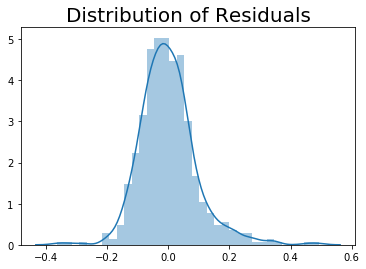

In [305]:
y_train_pred = lm.predict(X_train_sm)
res = y_train_pred - y_train
sns.distplot(res)
plt.title('Distribution of Residuals', fontsize=20)
plt.show()

## QQ-Plot of Residuals

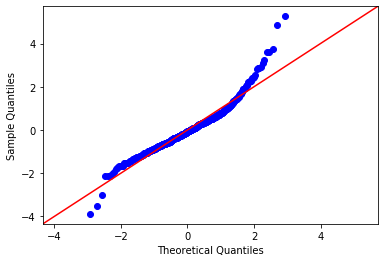

In [328]:
res_norm = (res-res.mean())/res.std()
sm.qqplot(res_norm, line='45')
plt.show()

This shows that we have normally distributed residuals with more tailing

## Visualise Residuals Vs y_train_pred

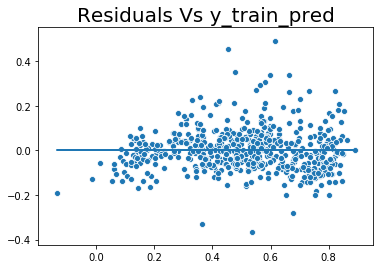

In [306]:
sns.scatterplot(x=y_train_pred, y=res)
y_ = [0]*len(y_train_pred)
plt.plot(y_train_pred, y_)
plt.title('Residuals Vs y_train_pred', fontsize=20)
plt.show()

## 6.2> Predictions on test set


In [258]:
df_test.shape

(146, 30)

In [259]:
var_list=['temp', 'hum', 'windspeed', 'cnt']
df_test[var_list] = scaler.transform(df_test[var_list])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,sep,mon,sat,sun,thu,tue,wed,clear,light,misty
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.527397,0.013699,0.664384,0.549872,0.639067,0.360539,0.528329,0.239726,0.212329,0.232877,...,0.068493,0.136986,0.143836,0.178082,0.150685,0.123288,0.116438,0.678082,0.006849,0.315068
std,0.500967,0.116637,0.473831,0.241666,0.131773,0.160686,0.216025,0.428386,0.410364,0.424119,...,0.253460,0.345016,0.352131,0.383899,0.358973,0.329899,0.321854,0.468820,0.082761,0.466142
min,0.000000,0.000000,0.000000,0.094267,0.283633,0.041051,0.067073,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340632,0.539417,0.260911,0.376726,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.570632,0.636032,0.342077,0.545732,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.777787,0.740039,0.441033,0.680022,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.975076,0.864144,0.937069,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [268]:
test_data = df_test.copy()

In [269]:
# Final features in model
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'spring', 'winter', 'dec', 'feb', 'jan', 'jul',
       'nov', 'sep', 'clear', 'light'],
      dtype='object')

In [270]:
y_test = test_data.pop('cnt')
X_test = test_data[X_train_rfe.columns]

In [271]:
X_test.head(3)

,yr,holiday,temp,spring,winter,dec,feb,jan,jul,nov,sep,clear,light
566,1,0,0.668758,0,0,0,0,0,1,0,0,0,1
374,1,0,0.310971,1,0,0,0,1,0,0,0,1,0
181,0,0,0.826591,0,0,0,0,0,1,0,0,1,0


In [272]:
X_test_sm = sm.add_constant(X_test)

### Predictions

In [273]:
y_test_pred = lm.predict(X_test_sm)

## 6.3> Estimate R2

In [275]:
R2 = r2_score(y_test, y_test_pred)

In [281]:
print('R2 is :', R2)

R2 is : 0.8295918586650561


## 6.4> Estimate Adjusted R2

In [276]:
N = y_test_pred.shape[0]
p = X_test_sm.shape[1]
print(N, p)

146 14


In [277]:
Adjusted_R2 = 1 - ((1-R2)*(N-1)/(N-1-p))

In [283]:
print('The Adjusted R2 is :', Adjusted_R2)

The Adjusted R2 is : 0.8113803015758254


## 6.5> Predictions Vs Actuals 

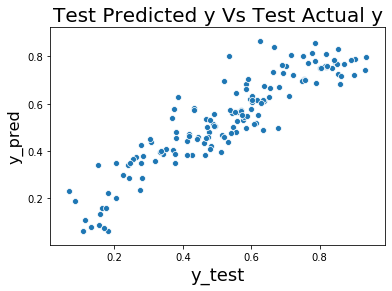

In [304]:
ax = sns.scatterplot(y = y_test_pred, x = y_test)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)   
plt.title('Test Predicted y Vs Test Actual y', fontsize=20)
plt.show()

The equation of best fitted line is 


$ cnt = 0.17 + 0.24  \times  yr - 0.08  \times  holiday + 0.39 \times temp - 0.10 \times spring + 0.08 \times winter - 0.07 \times dec - 0.05 \times feb - 0.07 \times jan - 0.06 \times jul - 0.07 \times nov + 0.04 \times sep + 0.08 \times clear - 0.22 \times light $

### Importance of coefficients

In [303]:
lm.params.sort_values()

light     -0.221407
spring    -0.099564
holiday   -0.078963
nov       -0.074865
jan       -0.067432
dec       -0.066492
jul       -0.057577
feb       -0.052727
sep        0.044887
clear      0.075296
winter     0.077431
const      0.174331
yr         0.238245
temp       0.391961
dtype: float64